In [2]:
import sys
import tkinter as tk
import numpy as np
import pyaudio
import math
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [5]:

fs = 44100
volume = 1
f = 130
duration = 3
unitNum = 2 #ユニット数
period = unitNum/f
start = 3/4 #波形を反転させる開始位置(1周期の中で)
end = 1 #波形を反転させる終了位置(1周期の中で)
unitNum = int(duration*f) #持続時間中に波形が何個入るか
t = np.linspace(0,duration,int(fs*duration))
tracAudio = np.abs(np.sin(2*math.pi*f*t)).astype(np.float32)

        
#範囲(start~end)に相当するデータを反転させる
for i in range(int(duration/period)):#1周期ごとにstart~endの範囲の波形を反転させる
    Indx = np.where((t>start*period+i*period)&(t<end*period+i*period))
    tracAudio[Indx] = -tracAudio[Indx]



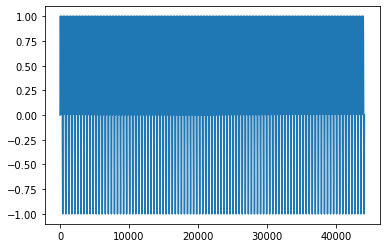

In [9]:
plt.plot(tracAudio)
plt.show()

In [15]:
#wavファイルで保存
output = "test.wav"
write(output, fs, tracAudio)

In [ ]:
#pysoundモジュールで再生
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=fs, frames_per_buffer=1024, output=True)
stream.write((volume * tracAudio).tostring()) #波形データに音量を反映させて文字列に変換して再生(文字列変換はモジュールの仕様)